In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the data from a CSV file
file_path = "S.Orders.csv"  # Replace with your file path
data = pd.read_csv(file_path, encoding='ISO-8859-1')
data.head ()

,Order ID,Order Customer Id,Order City,Order Country,order date (DateOrders),Order Region,Market,Order Status,Type,Days for shipping (real),Days for shipment (scheduled),Supplier Lead Time Of Delay,Delivery Status,Late_delivery_risk,shipping date (DateOrders),Shipping Mode,Order Total Sales,Order Total Real Sales (After Discount),Order Total Profit,Order Total Cost
0,1,11599,Mexico City,Mexico,1/1/2015 0:00,Central America,LATAM,Closed,Cash,2,4,-2,Advance Shipping,0,1/3/2015 0:00,Standard Class,299.98,239.98,88.7926,211.1874
1,2,256,Dos Quebradas,Colombia,1/1/2015 0:21,South America,LATAM,Pending_Payment,Payment,3,4,-1,Advance Shipping,0,1/4/2015 0:21,Standard Class,579.98,529.38,196.1079,383.8721
2,4,8827,Dos Quebradas,Colombia,1/1/2015 1:03,South America,LATAM,Closed,Cash,5,4,1,Late Delivery,1,1/6/2015 1:03,Standard Class,699.85,620.87,124.6809,575.1691
3,5,11318,Dos Quebradas,Colombia,1/1/2015 1:24,South America,LATAM,Complete,Debit,6,4,2,Late Delivery,1,1/7/2015 1:24,Standard Class,829.88,741.09,297.5947,532.2853
4,7,4530,São Paulo,Brazil,1/1/2015 2:06,South America,LATAM,Complete,Debit,3,2,1,Late Delivery,1,1/4/2015 2:06,Second Class,579.92,525.52,203.9994,375.9206


In [24]:
# Group by customer and calculate total sales
sales_distribution = data.groupby('Order Customer Id')['Order Total Sales'].sum().reset_index()

# Display the top 5 rows for inspection
print(sales_distribution.head())



   Order Customer Id  Order Total Sales
0                  1             499.95
1                  2            1719.77
2                  3            2447.76
3                  4             899.79
4                  5            1174.79


In [ ]:
# Queation 7
#1

question 7
2


<ipython-input-25-f9ca4343af47>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_customers, x='Order Customer Id', y='Order Total Sales', palette='viridis')


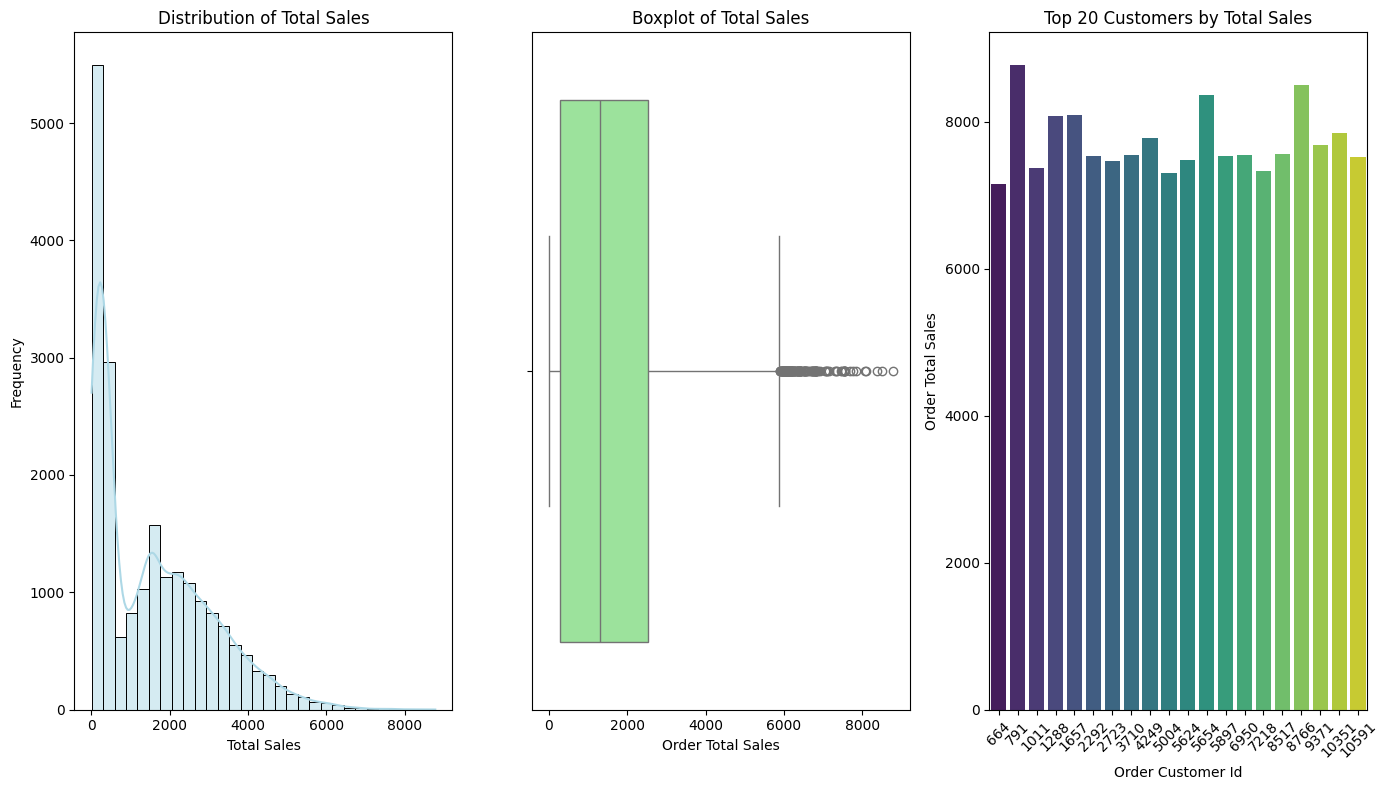

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))

# Histogram of total sales
plt.subplot(1, 3, 1)
sns.histplot(sales_distribution['Order Total Sales'], bins=30, kde=True, color='lightblue')
plt.title('Distribution of Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')

# Boxplot for outliers and distribution shape
plt.subplot(1, 3, 2)
sns.boxplot(data=sales_distribution, x='Order Total Sales', color='lightgreen')
plt.title('Boxplot of Total Sales')

# Top 20 customers by total sales - Bar Plot
top_customers = sales_distribution.nlargest(20, 'Order Total Sales')
plt.subplot(1, 3, 3)
sns.barplot(data=top_customers, x='Order Customer Id', y='Order Total Sales', palette='viridis')
plt.title('Top 20 Customers by Total Sales')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
#7
#2

In [28]:
# Group by customer segment and calculate total sales
segment_sales = data.groupby('Type')['Order Total Sales'].sum().reset_index()

# Sort by total sales in descending order
segment_sales = segment_sales.sort_values(by='Order Total Sales', ascending=False)

# Display the result
print(segment_sales)


       Type  Order Total Sales
1     Debit        12347550.07
3  Transfer         9000447.03
2   Payment         7441789.42
0      Cash         3524534.37


<ipython-input-29-1f3c6f50c0fd>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=segment_sales, x='Type', y='Order Total Sales', palette='pastel')


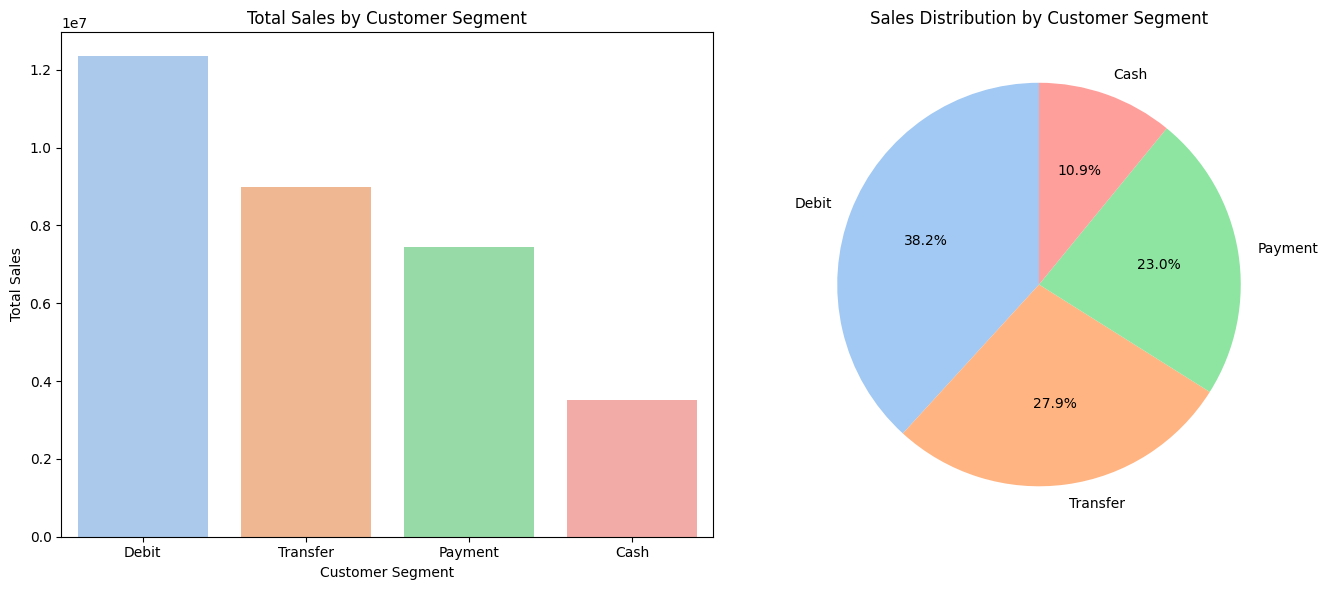

In [29]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# Bar plot for sales by segment
plt.subplot(1, 2, 1)
sns.barplot(data=segment_sales, x='Type', y='Order Total Sales', palette='pastel')
plt.title('Total Sales by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales')

# Pie chart for sales distribution
plt.subplot(1, 2, 2)
plt.pie(segment_sales['Order Total Sales'], labels=segment_sales['Type'],
        autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=90)
plt.title('Sales Distribution by Customer Segment')

plt.tight_layout()
plt.show()


In [ ]:
#7
#3

In [30]:
# Group by customer and calculate total sales, profit, and average risk
customer_stats = data.groupby('Order Customer Id')[['Order Total Sales', 'Order Total Profit', 'Late_delivery_risk']].agg({
    'Order Total Sales': 'sum',
    'Order Total Profit': 'sum',
    'Late_delivery_risk': 'mean'
}).reset_index()

# Add a column to identify high-risk and low-profit customers
customer_stats['High Risk'] = customer_stats['Late_delivery_risk'] > 0.5
customer_stats['Low Profit'] = customer_stats['Order Total Profit'] <= 0

# Display the result
print(customer_stats.head())


   Order Customer Id  Order Total Sales  Order Total Profit  \
0                  1             499.95            160.6330   
1                  2            1719.77            184.8289   
2                  3            2447.76            -19.0780   
3                  4             899.79           -557.0867   
4                  5            1174.79            282.9791   

   Late_delivery_risk  High Risk  Low Profit  
0            1.000000       True       False  
1            0.250000      False       False  
2            0.000000      False        True  
3            0.750000       True        True  
4            0.333333      False       False  


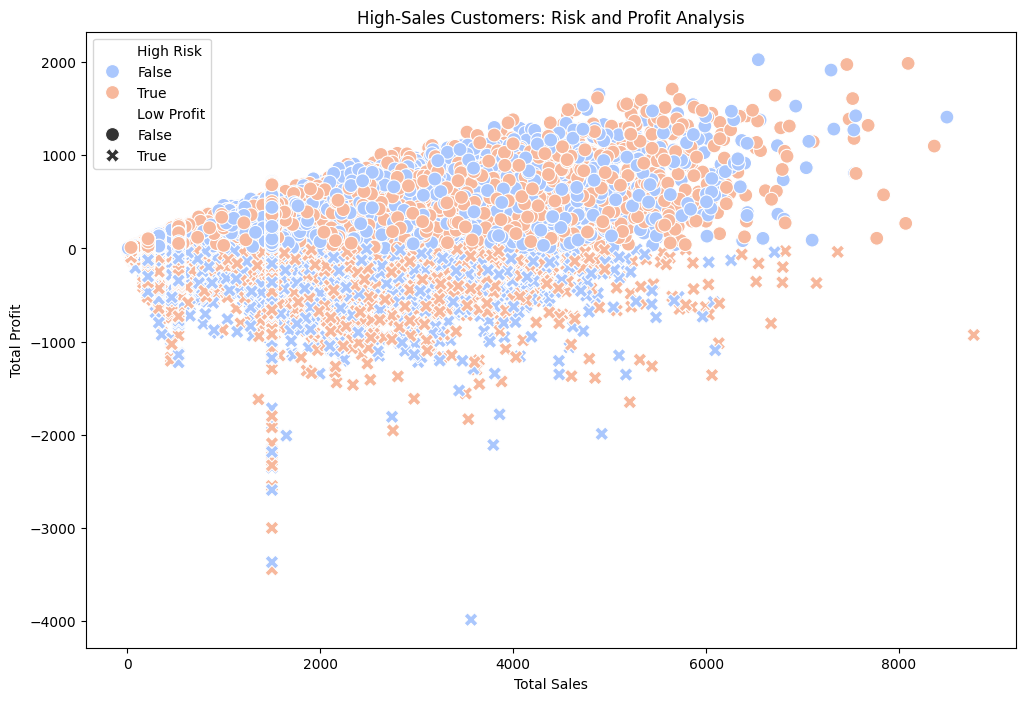

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

# Scatter plot for Sales vs. Profit, colored by risk and profit status
sns.scatterplot(data=customer_stats, x='Order Total Sales', y='Order Total Profit',
                hue='High Risk', style='Low Profit', palette='coolwarm', s=100)

# Adding titles and labels
plt.title('High-Sales Customers: Risk and Profit Analysis')
plt.xlabel('Total Sales')
plt.ylabel('Total Profit')

plt.show()


In [ ]:
#13
#1

Average Order Item Quantity: 1.0


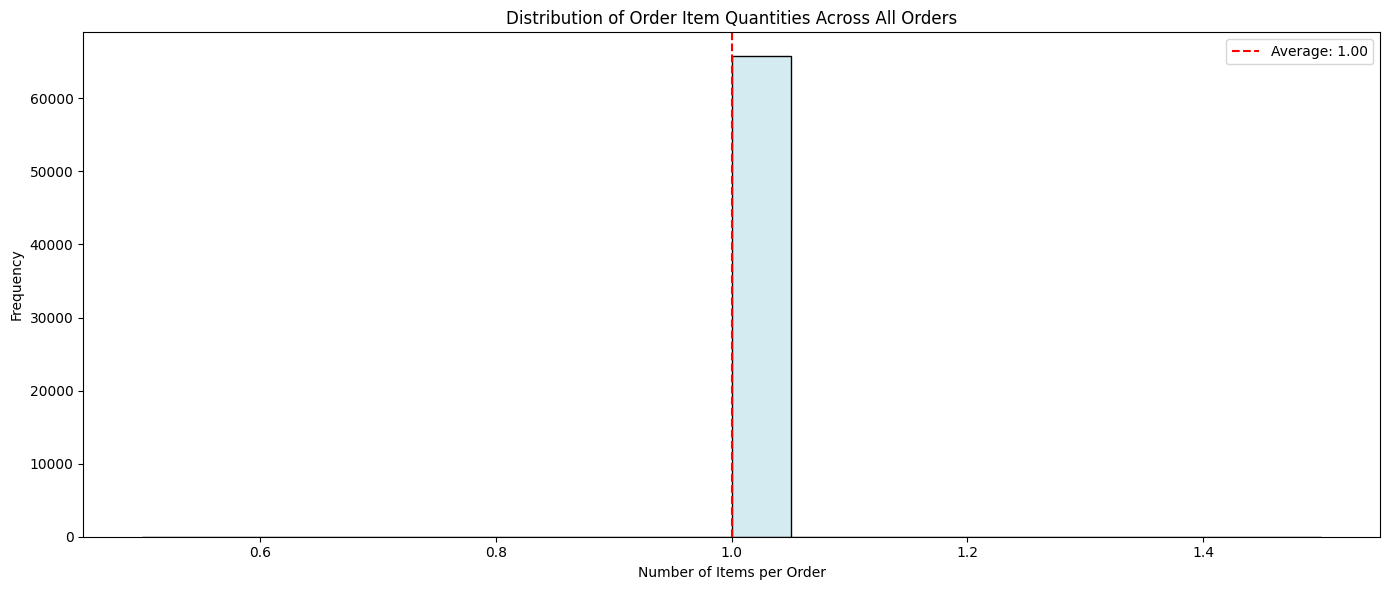

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Order ID' and count the number of items (rows) per order
order_item_counts = data.groupby('Order ID').size()

# Calculate the average order item quantity
average_order_item_quantity = order_item_counts.mean()
print(f"Average Order Item Quantity: {average_order_item_quantity}")

# Plotting the distribution
plt.figure(figsize=(14, 6))

# Histogram to show the distribution of items per order
sns.histplot(order_item_counts, bins=20, kde=True, color='lightblue')
plt.axvline(average_order_item_quantity, color='red', linestyle='--', label=f'Average: {average_order_item_quantity:.2f}')
plt.title('Distribution of Order Item Quantities Across All Orders')
plt.xlabel('Number of Items per Order')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()



In [ ]:
#13
#2

<ipython-input-37-1d40c2efd64e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Type', y='Order Total Sales', palette='Set2')


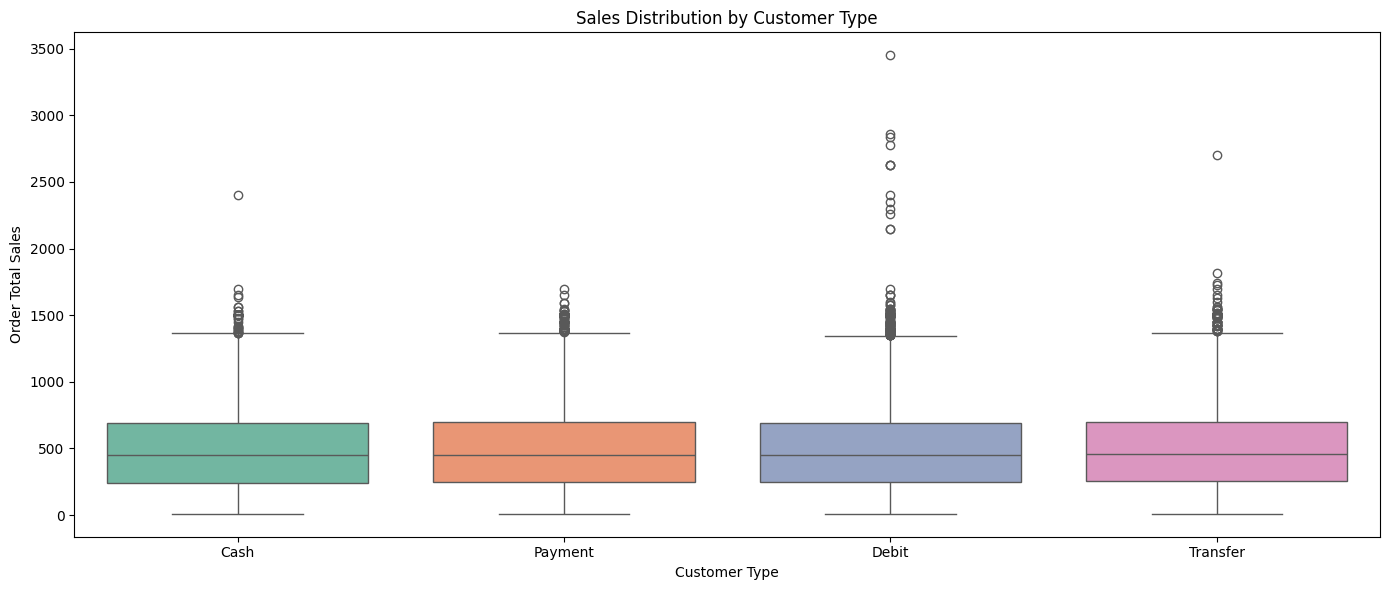

In [37]:
plt.figure(figsize=(14, 6))

# Box plot for distribution of sales by customer type
sns.boxplot(data=data, x='Type', y='Order Total Sales', palette='Set2')
plt.title('Sales Distribution by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Order Total Sales')

plt.tight_layout()
plt.show()


In [ ]:
#13
#3

In [41]:
# Group by 'Order ID' and count the number of items per order (rows per order)
order_item_counts = data.groupby('Order ID').size()

# Define high-quantity orders as those with more than a certain threshold (e.g., 10 items)
high_quantity_orders = order_item_counts[order_item_counts > 10].index  # Orders with more than 10 items

# Filter the dataset to get only high-quantity orders
high_quantity_data = data[data['Order ID'].isin(high_quantity_orders)]

# Define delays as where actual shipping days exceed scheduled shipping days
high_quantity_data['Delayed'] = high_quantity_data['Days for shipping (real)'] > high_quantity_data['Days for shipment (scheduled)']


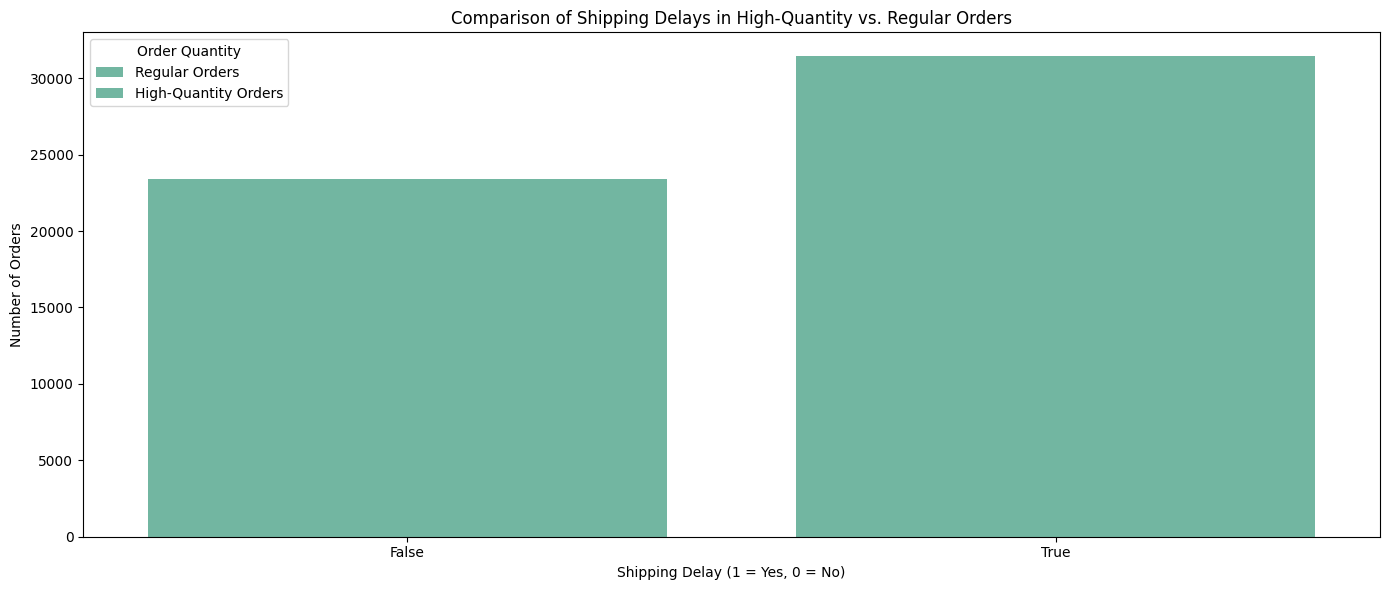

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compare delay status between high-quantity and regular orders
delay_comparison = data.groupby(['Order ID']).agg({
    'Days for shipping (real)': 'max',  # Get max shipping days for each order
    'Days for shipment (scheduled)': 'max'  # Get scheduled shipping days for each order
}).reset_index()

# Define high-quantity and regular orders
delay_comparison['Order Quantity'] = delay_comparison.groupby('Order ID').size()
delay_comparison['Delayed'] = delay_comparison['Days for shipping (real)'] > delay_comparison['Days for shipment (scheduled)']

# Split into high-quantity and regular orders
high_qty_orders = delay_comparison[delay_comparison['Order Quantity'] > 10]
regular_orders = delay_comparison[delay_comparison['Order Quantity'] <= 10]

# Plotting the results
plt.figure(figsize=(14, 6))

# Countplot to compare delay status for high-quantity vs. regular orders
sns.countplot(x='Delayed', data=delay_comparison, hue='Order Quantity', palette='Set2')
plt.title('Comparison of Shipping Delays in High-Quantity vs. Regular Orders')
plt.xlabel('Shipping Delay (1 = Yes, 0 = No)')
plt.ylabel('Number of Orders')
plt.legend(title='Order Quantity', labels=['Regular Orders', 'High-Quantity Orders'])

plt.tight_layout()
plt.show()


<ipython-input-43-357a89bf51fd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Delayed', y='Days for shipping (real)', data=delay_comparison, palette='Set2')


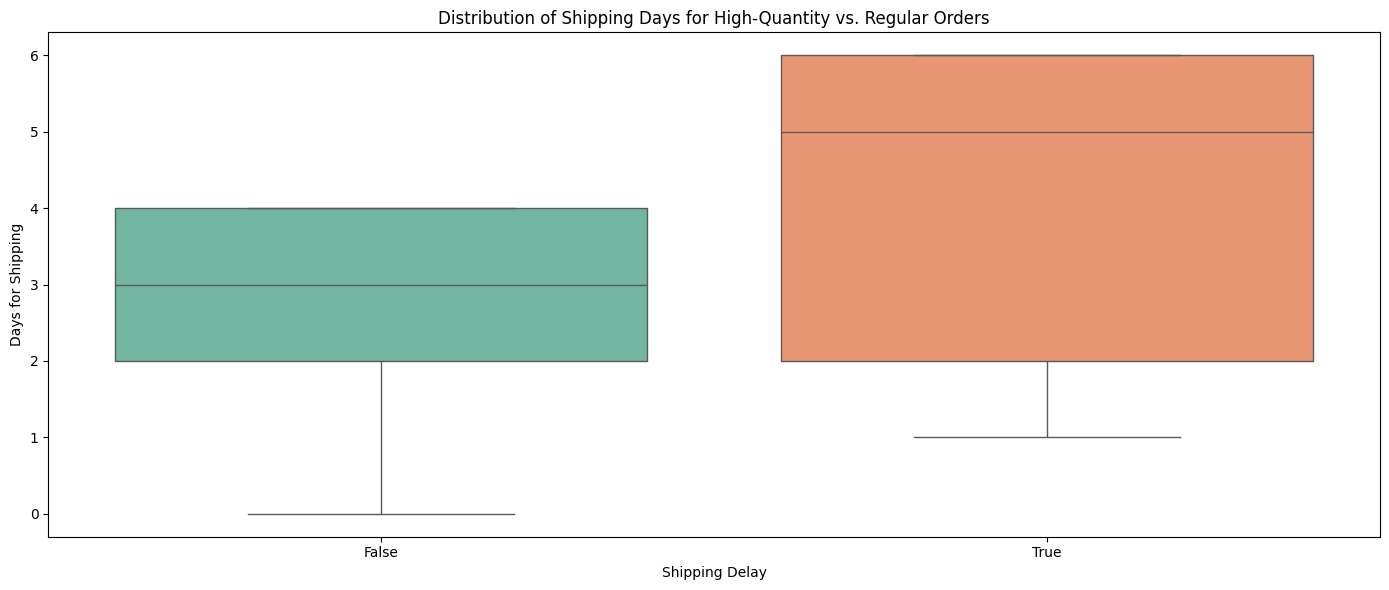

In [43]:
# Boxplot of shipping days for high-quantity and regular orders
plt.figure(figsize=(14, 6))

sns.boxplot(x='Delayed', y='Days for shipping (real)', data=delay_comparison, palette='Set2')
plt.title('Distribution of Shipping Days for High-Quantity vs. Regular Orders')
plt.xlabel('Shipping Delay')
plt.ylabel('Days for Shipping')

plt.tight_layout()
plt.show()


In [40]:
#14
#1

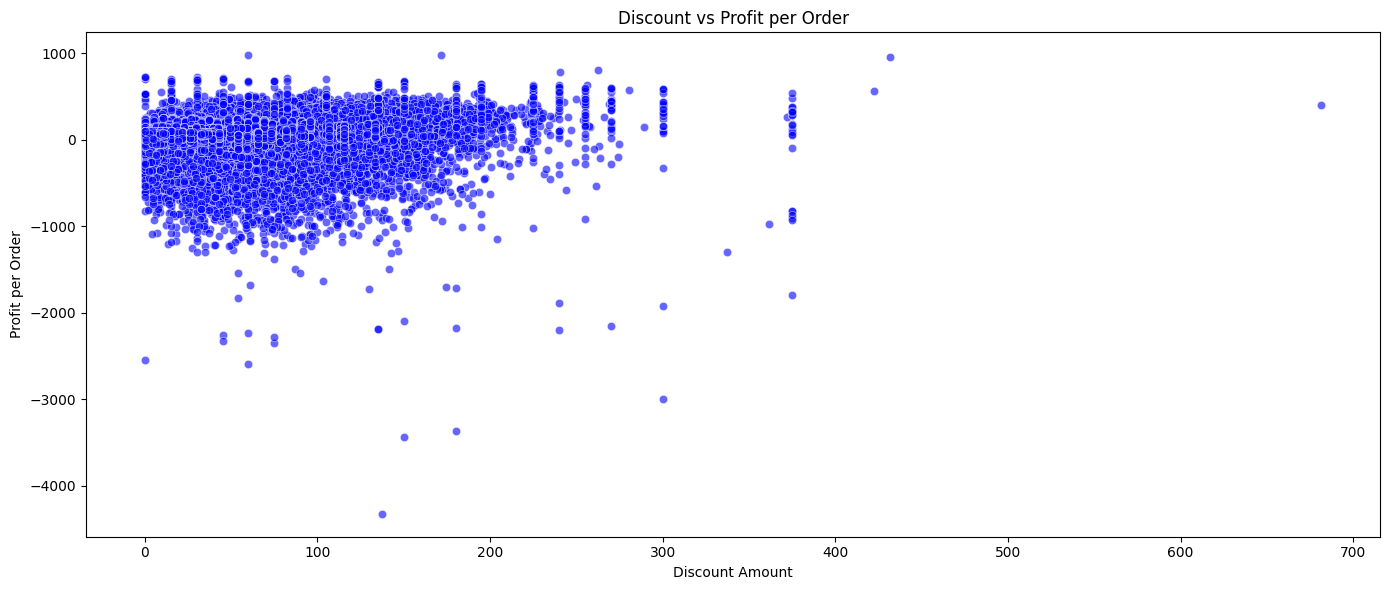

In [44]:
# Calculate the discount for each order
data['Discount'] = data['Order Total Sales'] - data['Order Total Real Sales (After Discount)']

# Scatter plot to visualize the relationship between Discount and Profit per Order
plt.figure(figsize=(14, 6))

sns.scatterplot(data=data, x='Discount', y='Order Total Profit', color='blue', alpha=0.6)
plt.title('Discount vs Profit per Order')
plt.xlabel('Discount Amount')
plt.ylabel('Profit per Order')

plt.tight_layout()
plt.show()
